# Report: Perennial Ryegrass Seed Shattering Nursery 2020
This report contains the data analysis from the shattering nursery's data, collected in 2020. This file is a combination of growth, harvest, and shattering data from 20 families and parents that were planted in a RCBD at TROE.

This file has been written as a Jupyter Notebook.

In [1]:
# Import dependencies
import numpy as np
import pandas as pd

# ggplot's cousin
from plotnine import *

from matplotlib import pyplot as plt
from matplotlib import cm

import joypy       # For ridgeline plots

# Make sure Jupyter Notebook shows all outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# Read compiled file
df0 = pd.read_csv("ShatNurse2020.csv")
# Look at first 5 rows
df0.head(5)

,Harvest,Plot,Bottom_Label,Top_Label,SPKS_env,SPKS_shaken,Detach_SEED_env,Detach_SEED_Shaken,NonDetach_TOT_Shaken,NonDetach_SEED_Shaken,...,Gustavsson_3,Gustavsson_4,Gustavsson_5,Lodging,Rust,Spks_H1,Spks_H2,Spks_H3,Spks_H4,TOT_harv_SPKS
0,H1,p_199,B1_P02_HS20,B1_r19_c10_199,3.0,3.0,0.390,0.005,0.309,0.206,...,59.0,65.0,65.0,3.0,2.0,3.0,7.0,0.0,7.0,17.0
1,H1,p_198,B1_P11,B1_r18_c10_198,7.0,7.0,0.048,0.057,1.231,0.996,...,65.0,65.0,61.0,3.0,2.0,7.0,6.0,0.0,8.0,21.0
2,H1,p_189,B1_P17_HS02,B1_r09_c10_189,1.0,1.0,0.012,0.015,0.135,0.041,...,52.0,56.0,65.0,3.0,4.0,1.0,1.0,1.0,4.0,7.0
3,H1,p_188,B1_P25,B1_r08_c10_188,10.0,10.0,0.167,0.041,1.049,0.624,...,65.0,65.0,65.0,2.0,4.0,10.0,25.0,11.0,17.0,63.0
4,H1,p_187,B1_P20,B1_r07_c10_187,1.0,1.0,0.000,0.000,0.089,0.025,...,51.0,40.0,45.0,4.0,1.0,1.0,0.0,6.0,0.0,7.0


In [3]:
# List the variables in the data file
print(df0.columns)

Index(['Harvest', 'Plot', 'Bottom_Label', 'Top_Label', 'SPKS_env',
       'SPKS_shaken', 'Detach_SEED_env', 'Detach_SEED_Shaken',
       'NonDetach_TOT_Shaken', 'NonDetach_SEED_Shaken', 'Reprod_Tillers',
       'RACHIS_wgt', 'AVG_Shatt_SPK', 'AVG_Yield_SPK', 'Row', 'Col', 'Block',
       'Pedigree', 'Germplasm', 'Gustavsson_1', 'Gustavsson_2', 'Gustavsson_3',
       'Gustavsson_4', 'Gustavsson_5', 'Lodging', 'Rust ', 'Spks_H1',
       'Spks_H2', 'Spks_H3', 'Spks_H4', 'TOT_harv_SPKS'],
      dtype='object')


In [4]:
# Number of rows and columns
df0.shape

(1412, 31)

## Split dataset into Parents' and Offspring's data

Shattering data points per family

In [5]:
# Half-sibs 
df_HS = df0[df0['Germplasm'] == 'HS']
# Parents
df_Parents = df0[df0['Germplasm'] == 'Parent']


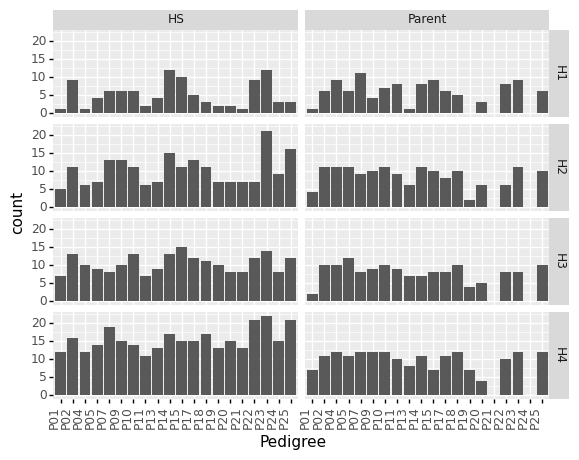

<ggplot: (-9223371896997046563)>

In [6]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1))

# Visualize count per family and harvest
ggplot(df0, aes(x='Pedigree')) + geom_bar(stat = 'count') + facet_grid('Harvest~Germplasm') + flip_xlabels

Missing data for some families

In [7]:
## Boxplots
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1))

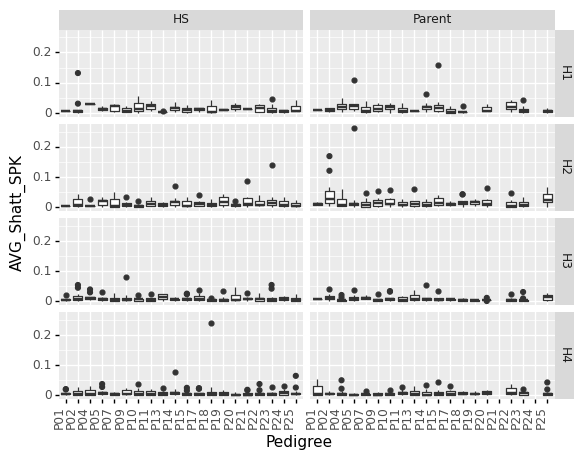

<ggplot: (139857734962)>

In [8]:
# Shattering by type of germplasm and harvest
ggplot(df0, aes(x='Pedigree', y=df0['AVG_Shatt_SPK'])) + geom_boxplot() + facet_grid('Harvest~Germplasm') + flip_xlabels

C:\Users\jbarreto\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
C:\Users\jbarreto\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_boxplot : Removed 181 rows containing non-finite values.


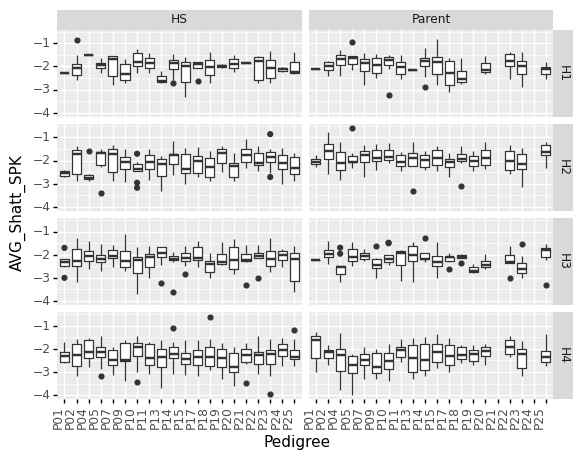

<ggplot: (-9223371896997015804)>

In [9]:
# Log transformed Shattering by type of germplasm and harvest
ggplot(df0, aes(x='Pedigree', y=np.log10(df0['AVG_Shatt_SPK']))) + geom_boxplot() + facet_grid('Harvest~Germplasm') + flip_xlabels

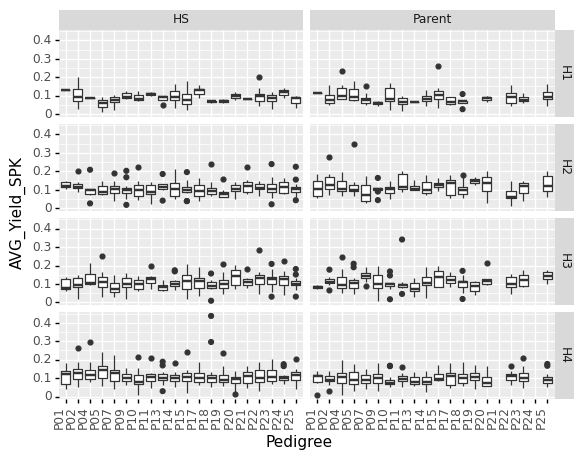

<ggplot: (-9223371896996962062)>

In [10]:
# Yield by type of germplasm and harvest
ggplot(df0, aes(x='Pedigree', y=df0['AVG_Yield_SPK'])) + geom_boxplot() + facet_grid('Harvest~Germplasm') + flip_xlabels


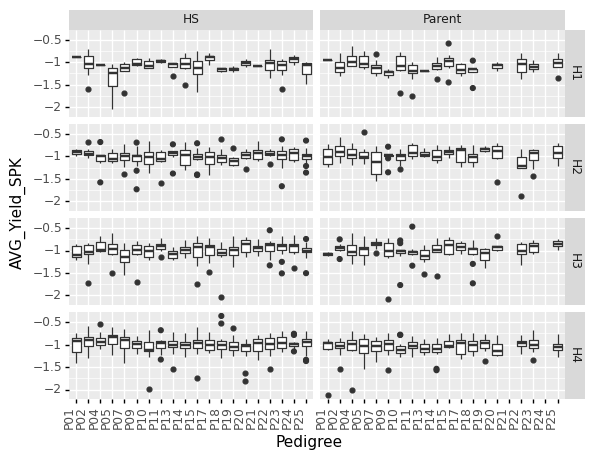

<ggplot: (-9223371896994446718)>

In [11]:
# Log transformed Yield by type of germplasm and harvest
ggplot(df0, aes(x='Pedigree', y=np.log10(df0['AVG_Yield_SPK']))) + geom_boxplot() + facet_grid('Harvest~Germplasm') + flip_xlabels 

In [12]:
# Outliers in this case may be to mistakes while entering the data
df1 = df0.copy()
df1 = df1[df1["AVG_Shatt_SPK"] < .1]

C:\Users\jbarreto\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
C:\Users\jbarreto\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_boxplot : Removed 189 rows containing non-finite values.


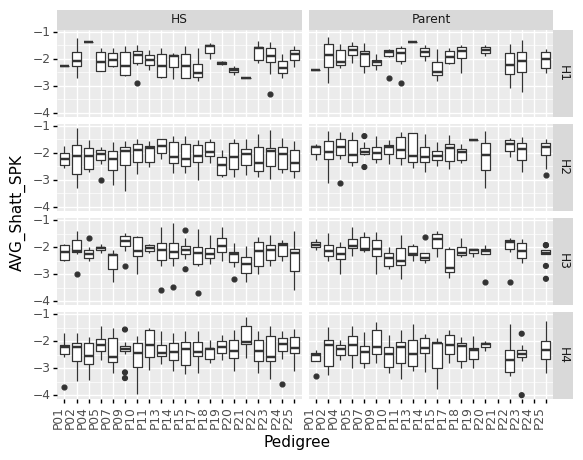

<ggplot: (-9223371896994421479)>

In [13]:
ggplot(df1, aes(x='Pedigree', y=np.log10(df1['AVG_Shatt_SPK']))) + geom_boxplot() + facet_grid('Harvest~Germplasm') + flip_xlabels 

C:\Users\jbarreto\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_boxplot : Removed 8 rows containing non-finite values.


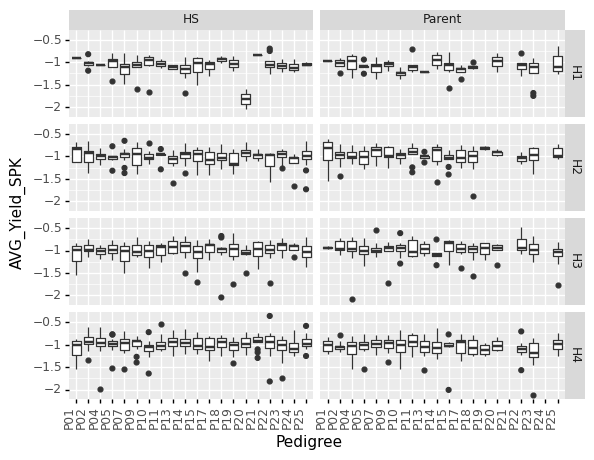

<ggplot: (139859025791)>

In [14]:
ggplot(df1, aes(x='Pedigree', y=np.log10(df1['AVG_Yield_SPK']))) + geom_boxplot() + facet_grid('Harvest~Germplasm') + flip_xlabels 

In [15]:
# Ridgeline plots

# Shattering Offsping
#fig, axes = joypy.joyplot(df_HS, by = 'Pedigree', 
#                          column = 'AVG_Shatt_SPK', 
#                          title="Total Yield Loss due to Shattering (Parents)", 
#                          colormap=cm.autumn_r)

# Trait Transformation
Gust 1 --> day 26 \
Gust 2 --> day 36 \
Gust 3 --> day 42 \
Gust 4 --> day 49 \
Gust 5 --> day 53 


C:\Users\jbarreto\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_boxplot : Removed 8 rows containing non-finite values.


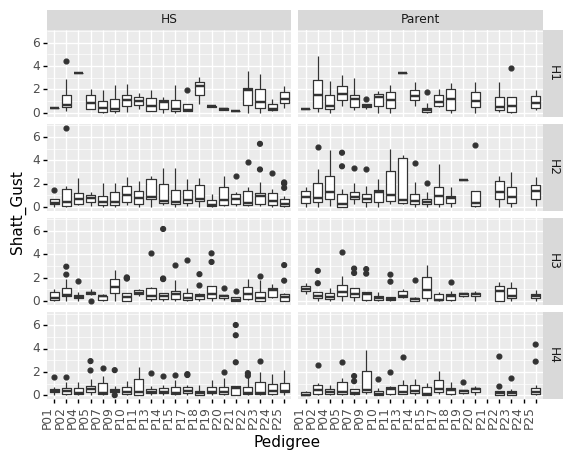

<ggplot: (139860725582)>

C:\Users\jbarreto\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_boxplot : Removed 8 rows containing non-finite values.


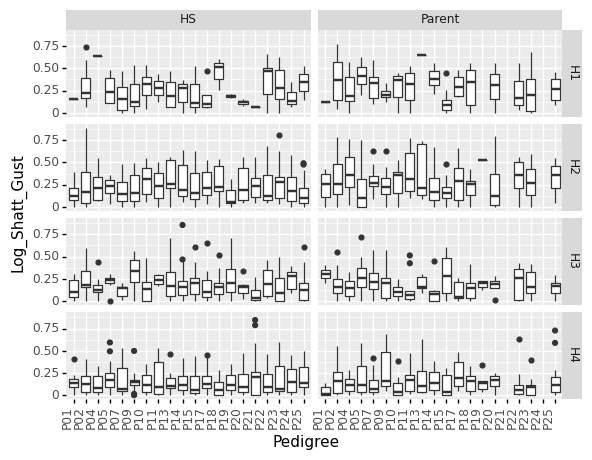

<ggplot: (-9223371896995916719)>

In [16]:
# Log of shattering
df1['Log_AVG_Shatt_SPK'] = np.log10(df1['AVG_Shatt_SPK']+1)

# Integrating Gustavssons data
df1['AUC_Gust_sum'] = ( ( np.mean(df1['Gustavsson_1'] + 10) / 26 ) + ( (df1['Gustavsson_1'] + df1['Gustavsson_2']) / 10 ) + ( np.mean(df1['Gustavsson_2'] + df1['Gustavsson_3']) / 6 ) + ( np.mean(df1['Gustavsson_3'] + df1['Gustavsson_4']) / 7 ) + ( np.mean(df1['Gustavsson_4'] + df1['Gustavsson_5']) / 4 ) )
# Correct shattering with Gustavsson's integral
df1['Shatt_Gust'] = df1['AVG_Shatt_SPK'] * df1['AUC_Gust_sum']
df1['Log_Shatt_Gust'] = np.log10(df1['Shatt_Gust'] + 1)


ggplot(df1, aes(x='Pedigree', y=df1['Shatt_Gust'])) + geom_boxplot() + facet_grid('Harvest~Germplasm') + flip_xlabels 
ggplot(df1, aes(x='Pedigree', y=df1['Log_Shatt_Gust'])) + geom_boxplot() + facet_grid('Harvest~Germplasm') + flip_xlabels 

# Estimating Heritability
Each environment will be considered as a separate dataset.
Some resources: 
- https://d-nb.info/1209196328/34
- ....

First environment is TROE 2020. The model to use here is:
$$
\gamma_{ij} = \mu + g_{i} + block_{j} + \varepsilon_{ij}
$$

where $\gamma_{ij}$ is the average shattering per spike (grams) of the $i^{t h}$ genotype, i.e., spaced-plant, in the $j^{t h}$ block, and $\varepsilon_{ij}$ is the error associated with $\gamma_{ij}$.


In [2]:
#print(df_HS.columns)
from pymer4.models import Lmer

# Function to estimate Total Genetic Variance
def TotGenVar(df, Trait, Germplasm, Harvest, Family = None):
    df_subset = df[df['Harvest'] == str('H' + str(Harvest))]
    df_subset = df_subset[df_subset['Germplasm'] == Germplasm]
    
    model = Lmer('{} ~  (1|Block) + (1|Pedigree)'.format(Trait), data=df_subset)
    print("Printing results for trait " + Trait + ' in ' + Germplasm + ' for Harvest ' + str(Harvest) )
    print(model.fit())


#df_HS['Log_AVG_Shatt_SPK'] = np.log10(df_HS['AVG_Shatt_SPK'] + 0.0000000001) 
#model2 = Lmer('Shatt_Gust ~  (1|Block) + (1|Pedigree)', data=df1)
#model2.fit()
# Get population level coefficients
#print(model.coefs)

# ANOVA results from fitted model
#display(model2.anova())
# Plot estimated model coefficients 
#model.plot_summary()

In [3]:
#TotGenVar(df1, Trait = 'Shatt_Gust', Germplasm = 'HS' , Harvest = 2)
TotGenVar(df1, Trait = 'AVG_Shatt_SPK', Germplasm = 'HS' , Harvest = 1)
TotGenVar(df1, Trait = 'AVG_Shatt_SPK', Germplasm = 'HS' , Harvest = 2)
TotGenVar(df1, Trait = 'AVG_Shatt_SPK', Germplasm = 'HS' , Harvest = 3)
TotGenVar(df1, Trait = 'AVG_Shatt_SPK', Germplasm = 'HS' , Harvest = 4)



NameError: name 'df1' is not defined

In [19]:
TotGenVar(df1, Trait = 'Log_AVG_Shatt_SPK', Germplasm = 'HS' , Harvest = 1)
TotGenVar(df1, Trait = 'Log_AVG_Shatt_SPK', Germplasm = 'HS' , Harvest = 2)
TotGenVar(df1, Trait = 'Log_AVG_Shatt_SPK', Germplasm = 'HS' , Harvest = 3)
TotGenVar(df1, Trait = 'Log_AVG_Shatt_SPK', Germplasm = 'HS' , Harvest = 4)

Printing results for trait Log_AVG_Shatt_SPK in HS for Harvest 1
boundary (singular) fit: see ?isSingular 

Formula: Log_AVG_Shatt_SPK~(1|Block)+(1|Pedigree)

Family: gaussian	 Inference: parametric

Number of observations: 100	 Groups: {'Pedigree': 20.0, 'Block': 4.0}

Log-likelihood: 372.160 	 AIC: -744.319

Random effects:

                 Name  Var    Std
Pedigree  (Intercept)  0.0  0.001
Block     (Intercept)  0.0  0.000
Residual               0.0  0.005

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
(Intercept)     0.007   0.005    0.008  0.001  10.329  10.595    0.0  ***
Printing results for trait Log_AVG_Shatt_SPK in HS for Harvest 2
boundary (singular) fit: see ?isSingular 

Formula: Log_AVG_Shatt_SPK~(1|Block)+(1|Pedigree)

Family: gaussian	 Inference: parametric

Number of observations: 203	 Groups: {'Pedigree': 20.0, 'Block': 4.0}

Log-likelihood: 744.917 	 AIC: -1489.834

Random effects:


In [1]:
TotGenVar(df1, Trait = 'Shatt_Gust', Germplasm = 'Parent' , Harvest = 1)
TotGenVar(df1, Trait = 'Shatt_Gust', Germplasm = 'Parent' , Harvest = 2)
TotGenVar(df1, Trait = 'Shatt_Gust', Germplasm = 'Parent' , Harvest = 3)
TotGenVar(df1, Trait = 'Shatt_Gust', Germplasm = 'Parent' , Harvest = 4)

NameError: name 'TotGenVar' is not defined